# Testing for Measurement Invariance on the Remission from Depression Questionnaire (RDQ)


## Load Pacakge

In [116]:
library(foreign)
library(dplyr)
library(reshape)
library(psych)
library(lavaan)
library(data.table)
library(lavaanPlot)


Attaching package: ‘data.table’


The following object is masked from ‘package:reshape’:

    melt


The following objects are masked from ‘package:dplyr’:

    between, first, last




## Load Data

In [99]:
rdqPre = read.spss('../Data/PrePostMeasures/RDQPre_1.sav', to.data.frame = T)[,2:61] #Pre-treatment RDQ
rdqPost = read.spss('../Data/PrePostMeasures/RDQPost_1.sav', to.data.frame = T)[,2:61] #Post-treatment RDQ

Warning message in read.spss("../Data/PrePostMeasures/RDQPre_1.sav", to.data.frame = T):
“Undeclared level(s) 12 added in variable: rdqpre_35_1”
Warning message in read.spss("../Data/PrePostMeasures/RDQPre_1.sav", to.data.frame = T):
“Undeclared level(s) 10 added in variable: rdqpre_43_1”
Warning message in read.spss("../Data/PrePostMeasures/RDQPre_1.sav", to.data.frame = T):
“Undeclared level(s) 10 added in variable: rdqpre_44_1”
Warning message in read.spss("../Data/PrePostMeasures/RDQPre_1.sav", to.data.frame = T):
“Undeclared level(s) 10 added in variable: rdqpre_49_1”
Warning message in read.spss("../Data/PrePostMeasures/RDQPre_1.sav", to.data.frame = T):
“Undeclared level(s) 3 added in variable: rdqpre_52_1”
Warning message in read.spss("../Data/PrePostMeasures/RDQPre_1.sav", to.data.frame = T):
“Undeclared level(s) 2 added in variable: PrimaryLast”
Warning message in read.spss("../Data/PrePostMeasures/RDQPost_1.sav", to.data.frame = T):
“Undeclared level(s) 11 added in variable:

## Recode Data

In [103]:
#Map categorical description to Likert-type scale
rdqRecode = function(x){
    factor(x, levels = c('not at all or rarely true','sometimes true','often or almost always true'),
                          labels = c(0,1,2))
}

rdqPreC = data.frame(lapply(rdqPre, rdqRecode))
rdqPreC = data.frame(lapply(rdqPre, as.numeric))

rdqPostC = data.frame(lapply(rdqPost, rdqRecode))
rdqPostC = data.frame(lapply(rdqPost, as.numeric))


In [105]:
#Code NAs
rdqPreC[rdqPreC>3] = NA
rdqPostC[rdqPostC>3] = NA

#Median imputation
medianImputation = function(x){x[is.na(x)] = median(x, na.rm=T)
                              return(x)}
rdqPreC_Imp = 
    rdqPreC %>%
    mutate_all(medianImputation)

rdqPostC_Imp = 
    rdqPostC %>%
    mutate_all(medianImputation)

#Rename RDQ columns
names(rdqPreC_Imp) = paste0('x',c(1:60))
names(rdqPostC_Imp) = paste0('x',c(1:60))

rdqPreC_Imp
rdqPostC_Imp

x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,⋯,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,3,3,2,1,3,1,3,3,3,⋯,2,3,1,1,2,1,1,1,1,1
3,3,3,2,1,3,1,3,3,3,⋯,2,3,1,1,2,1,1,1,1,1
3,3,3,2,1,3,1,3,3,3,⋯,2,2,1,2,3,2,2,1,1,1
3,3,3,3,1,3,1,3,3,3,⋯,3,3,1,1,1,1,1,1,1,1
3,3,3,1,3,3,1,3,3,3,⋯,2,3,2,1,1,1,1,1,1,1
3,2,3,2,1,1,3,3,2,3,⋯,2,3,2,1,2,1,1,1,2,1
3,3,3,2,1,3,1,3,3,3,⋯,2,3,1,1,2,1,1,1,1,1
3,3,3,3,1,3,1,3,2,3,⋯,1,2,2,2,2,2,2,1,1,2
1,2,2,3,1,3,1,2,1,1,⋯,1,1,2,2,2,2,2,2,3,2


x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,⋯,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,1,1,1,1,1,1,1,⋯,1,1,3,3,3,3,3,3,3,3
2,2,2,1,1,2,1,2,2,2,⋯,1,2,2,2,2,2,2,2,2,2
2,2,2,1,1,2,1,2,2,2,⋯,1,2,2,2,2,2,2,2,2,2
3,3,3,3,1,1,2,3,2,2,⋯,2,2,1,1,2,1,1,1,1,1
3,3,3,1,3,2,1,3,3,3,⋯,3,3,1,1,1,1,1,1,1,1
2,2,2,1,1,2,1,2,2,2,⋯,1,2,2,2,2,2,2,2,2,2
2,2,2,1,1,2,1,2,2,2,⋯,1,2,2,2,2,2,2,2,2,2
2,2,2,1,1,2,1,2,2,2,⋯,1,2,2,2,2,2,2,2,2,2
2,2,2,1,1,2,1,2,2,2,⋯,1,2,2,2,2,2,2,2,2,2


## Scree Plot & Parallel Analysis

Parallel analysis suggests that the number of factors =  40  and the number of components =  10 


Warning message in cor.smooth(mat):
“Matrix was not positive definite, smoothing was done”


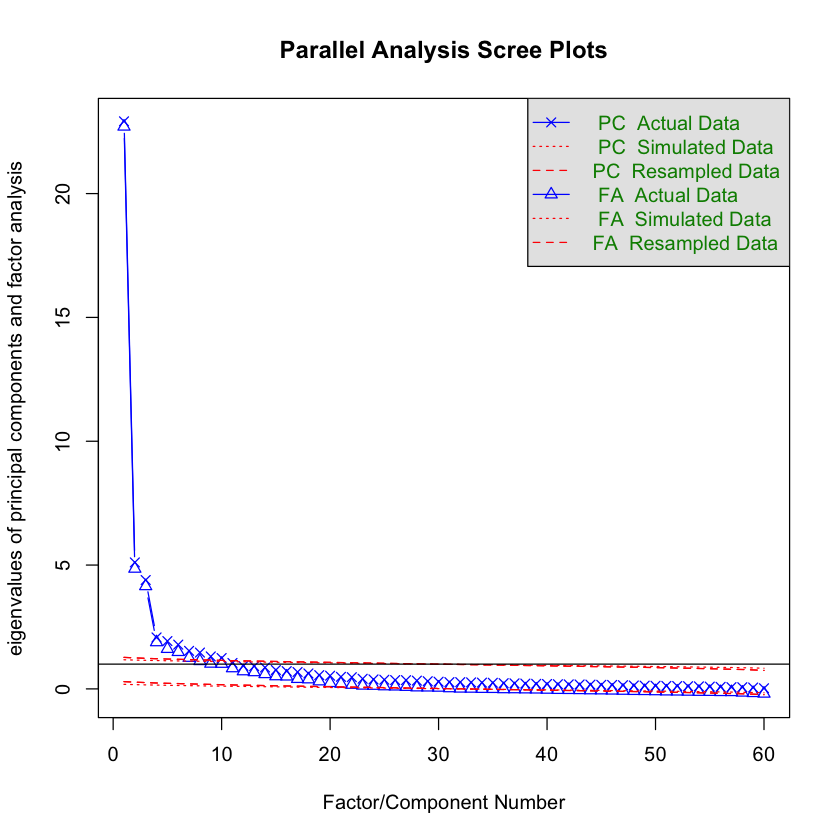

Parallel analysis suggests that the number of factors =  NA  and the number of components =  7 


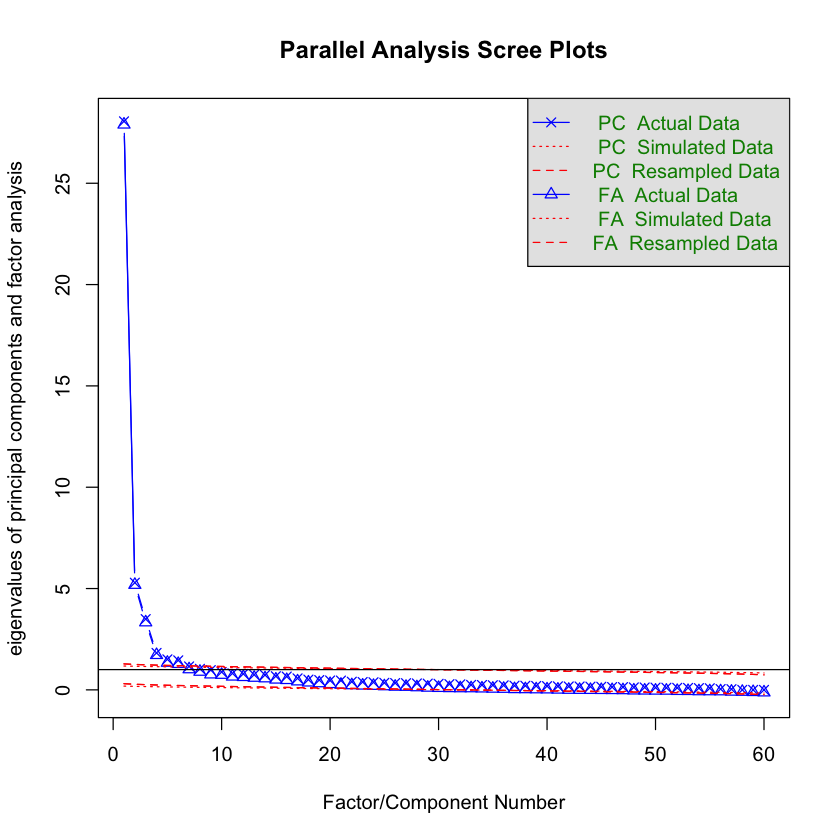

In [106]:
rdqPreScree= fa.parallel(rdqPreC_Imp,n.iter=20,SMC=TRUE,  fm = "wls", cor = 'poly', fa="both")
rdqPostScree = fa.parallel(rdqPostC_Imp,n.iter=20, SMC=TRUE,  fm = "wls", cor = 'poly', fa="both")

Based on scree plot, three to four factors should be sufficient. We tested the three-factor model first.

## Build an ESEM model for measurement invariance test

In [107]:
#Start with exploratory factor anlysis 
rdqPreFa = fa(rdqPreC, nfactors = 3, cor = 'poly', fm="wls")
rdqPostFa = fa(rdqPostC, nfactors = 3, cor = 'poly', fm='wls')

Loading required namespace: GPArotation



In [108]:
write.csv(rdqPreFa$loadings, '../Results/rdqPostFa.csv')
write.csv(rdqPostFa$loadings, '../Results/rdqPostFa.csv')

In [127]:
#Prepare factor loading tables for ESEM
rdqPreFaLoadings = as.data.frame(matrix(rdqPreFa$loadings, nrow = 60, ncol = 3))
names(rdqPreFaLoadings) = c('F1', 'F2', 'F3')
rdqPreFaLoadings$item = paste0('x',c(1:60))
rdqPreFaLoadings4ESEM = melt(rdqPreFaLoadings, "item", variable.name = "latent")
rdqPreFaLoadings4ESEM 

Warning message in melt(rdqPreFaLoadings, "item", variable.name = "latent"):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(rdqPreFaLoadings). In the next version, this warning will become an error.”


item,latent,value
<chr>,<fct>,<dbl>
x1,F1,-0.447642127
x2,F1,-0.447397032
x3,F1,-0.509706810
x4,F1,-0.126768412
x5,F1,0.083549984
x6,F1,-0.026549858
x7,F1,-0.173383760
x8,F1,-0.366613461
x9,F1,-0.162889314


In [128]:
#Set anchors 
anchors = c(F1 = "x60", F2 = "x15", F3 = 'x51')
anchors

F1    F2    F3 
"x60" "x15" "x51"

In [133]:
#Make data frmae into data tables 
rdqPreFaLoadings4ESEM = as.data.table(rdqPreFaLoadings4ESEM)


In [130]:
#Make ESEM model
make_esem_model <- function (loadings_dt, anchors){
  
  # make is_anchor variable
  loadings_dt[, is_anchor := 0]
  for (l in names(anchors)) loadings_dt[latent != l & item == anchors[l], is_anchor := 1]
  
  # make syntax column per item; syntax is different depending on is_anchor
  loadings_dt[is_anchor == 0, syntax := paste0("start(",value,")*", item)]
  loadings_dt[is_anchor == 1, syntax := paste0(value,"*", item)]
  
  #Make syntax for each latent variable
   each_syntax <- function (l){
    paste(l, "=~", paste0(loadings_dt[latent == l, syntax], collapse = "+"),"\n")
   }
   
   # Put all syntaxes together
   paste(sapply(unique(loadings_dt$latent), each_syntax), collapse = " ")
}


#make model
esem_model <- make_esem_model(rdqPreFaLoadings4ESEM, anchors)
#print model
writeLines(esem_model)


F1 =~ start(-0.447642126554329)*x1+start(-0.447397031763013)*x2+start(-0.509706809782911)*x3+start(-0.126768412427212)*x4+start(0.0835499843774097)*x5+start(-0.0265498575018517)*x6+start(-0.173383759629627)*x7+start(-0.366613460992285)*x8+start(-0.162889314391314)*x9+start(-0.328246356877266)*x10+start(-0.195566748311355)*x11+start(-0.210949051146155)*x12+start(-0.346198085483079)*x13+start(-0.263102011912843)*x14+-0.0100316645090616*x15+start(-0.00843795855367094)*x16+start(-0.135833443445902)*x17+start(-0.0105352137449073)*x18+start(-0.116758610065386)*x19+start(0.026824403106597)*x20+start(0.056988563722344)*x21+start(0.134943786626706)*x22+start(0.07039011230606)*x23+start(0.134352287946214)*x24+start(0.0787316234474896)*x25+start(0.51710358763161)*x26+start(0.545743895243333)*x27+start(0.57994506949136)*x28+start(-0.0403139833166679)*x29+start(-0.0780594998994538)*x30+start(0.660024203102974)*x31+start(0.697578273057954)*x32+start(0.740996124573032)*x33+start(0.767567155512536)*x3

item,latent,value,is_anchor,syntax
<chr>,<fct>,<dbl>,<dbl>,<chr>
x1,F1,-0.447642127,0,start(-0.447642126554329)*x1
x2,F1,-0.447397032,0,start(-0.447397031763013)*x2
x3,F1,-0.509706810,0,start(-0.509706809782911)*x3
x4,F1,-0.126768412,0,start(-0.126768412427212)*x4
x5,F1,0.083549984,0,start(0.0835499843774097)*x5
x6,F1,-0.026549858,0,start(-0.0265498575018517)*x6
x7,F1,-0.173383760,0,start(-0.173383759629627)*x7
x8,F1,-0.366613461,0,start(-0.366613460992285)*x8
x9,F1,-0.162889314,0,start(-0.162889314391314)*x9


In [132]:
#ESEM model estimation 
rdqPreEsemFit <- cfa(esem_model, rdqPreC_Imp, ordered = T, std.lv=T, estimator = 'WLSMV')
summary(rdqPreEsemFit, fit.measures = T, standardized = T)

lavaan 0.6-7 ended normally after 159 iterations

  Estimator                                       DWLS
  Optimization method                           NLMINB
  Number of free parameters                        297
                                                      
  Number of observations                          7277
                                                      
Model Test User Model:
                                               Standard      Robust
  Test Statistic                              69048.298   86979.269
  Degrees of freedom                               1593        1593
  P-value (Chi-square)                            0.000       0.000
  Scaling correction factor                                   0.799
  Shift parameter                                           609.981
       simple second-order correction                              

Model Test Baseline Model:

  Test statistic                           2088296.690  364544.102
  Degrees of freedom     

In [135]:
#Summary of the ESEM model
rdqbind = rbind(rdqPreC_Imp, rdqPostC_Imp)
rdqbind$group = c(rep('Pre', nrow(rdqPreC_Imp)), rep('post', nrow(rdqPostC_Imp)))

rdqEsemConfigFit <- cfa(esem_model, rdqbind, group = 'group', ordered = T, std.lv=T, estimator = 'WLSMV')
summary(rdqEsemConfigFit, fit.measures = T, standardized = T)

lavaan 0.6-7 ended normally after 334 iterations

  Estimator                                       DWLS
  Optimization method                           NLMINB
  Number of free parameters                        594
                                                      
  Number of observations per group:                   
    Pre                                           7277
    post                                          7257
                                                      
Model Test User Model:
                                                Standard      Robust
  Test Statistic                              136182.839  185440.958
  Degrees of freedom                                3186        3186
  P-value (Chi-square)                             0.000       0.000
  Scaling correction factor                                    0.739
  Shift parameter for each group:                                   
      Pre                                                    624.915
    

In [136]:
write.csv(inspect(rdqEsemConfigFit,what="std")$Pre$lambda, '../Results/rdqPreESEM.csv')
write.csv(inspect(rdqEsemConfigFit,what="std")$post$lambda, '../Results/rdqPostESEM.csv')

In [138]:
#Metric Fit
rdqEsemMetricFit <- cfa(esem_model, rdqbind, group = 'group', ordered = T, std.lv=T, estimator = 'WLSMV', group.equal = c("loadings"))
summary(rdqEsemMatricFit, fit.measures = T, standardized = T)

lavaan 0.6-7 ended normally after 192 iterations

  Estimator                                       DWLS
  Optimization method                           NLMINB
  Number of free parameters                        597
  Number of equality constraints                   174
                                                      
  Number of observations per group:                   
    Pre                                           7277
    post                                          7257
                                                      
Model Test User Model:
                                                Standard      Robust
  Test Statistic                              196928.163  160619.829
  Degrees of freedom                                3357        3357
  P-value (Chi-square)                             0.000       0.000
  Scaling correction factor                                    1.239
  Shift parameter for each group:                                   
      Pre         

Configural Invariance (structural equivalence): the same model holds for all the groups

Metric Invariance (measurement unit equivalence): factor loadings (slopes) are the same across the groups

In [144]:
#Configuration vs. Matric Fit
anova(rdqEsemConfigFit, rdqEsemMetricFit)

,Df,AIC,BIC,Chisq,Chisq diff,Df diff,Pr(>Chisq)
,<int>,<lgl>,<lgl>,<dbl>,<dbl>,<int>,<dbl>
rdqEsemConfigFit,3186,NA,NA,136182.8,NA,NA,NA
rdqEsemMetricFit,3357,NA,NA,196928.2,10872.69,171,0


In [146]:
adj = lavTestScore(rdqEsemMatricFit)
adj

Warning message in lavTestScore(rdqEsemMatricFit):
“lavaan WARNING: se is not `standard'; not implemented yet; falling back to ordinary score test”


$test

total score test:

   test      X2  df p.value
1 score 22689.7 174       0

$uni

univariate score tests:

       lhs op    rhs       X2 df p.value
1     .p1. == .p490.  229.007  1   0.000
2     .p2. == .p491.   42.747  1   0.000
3     .p3. == .p492.  142.120  1   0.000
4     .p4. == .p493.   38.547  1   0.000
5     .p5. == .p494.   51.063  1   0.000
6     .p6. == .p495.  365.775  1   0.000
7     .p7. == .p496.  355.372  1   0.000
8     .p8. == .p497.   33.221  1   0.000
9     .p9. == .p498.   72.170  1   0.000
10   .p10. == .p499.   18.521  1   0.000
11   .p11. == .p500.    1.260  1   0.262
12   .p12. == .p501.   15.833  1   0.000
13   .p13. == .p502.  275.536  1   0.000
14   .p14. == .p503.  269.761  1   0.000
15   .p16. == .p505.  181.686  1   0.000
16   .p17. == .p506.   66.435  1   0.000
17   .p18. == .p507.   69.626  1   0.000
18   .p19. == .p508.   47.926  1   0.000
19   .p20. == .p509.   31.989  1   0.000
20   .p21. == .p510.  523.636  1   0.000
21   .p22. == .p511.  352.363  1   0.000
22   .p23. == .p512.   49.404  1   0.000
23   .p24. == .p513.  298.006  1   0.000
24   .p25. == .p514.  157.437  1   0.000
25   .p26. == .p515.  171.262  1   0.000
26   .p27. == .p516.   34.720  1   0.000
27   .p28. == .p517.    6.823  1   0.009
28   .p29. == .p518.  753.678  1   0.000
29   .p30. == .p519.  702.330  1   0.000
30   .p31. == .p520.    0.053  1   0.818
31   .p32. == .p521.    6.177  1   0.013
32   .p33. == .p522.  185.856  1   0.000
33   .p34. == .p523.  149.556  1   0.000
34   .p35. == .p524.   26.653  1   0.000
35   .p36. == .p525.    0.874  1   0.350
36   .p37. == .p526.    0.303  1   0.582
37   .p38. == .p527.   11.020  1   0.001
38   .p39. == .p528.    0.163  1   0.686
39   .p40. == .p529.   68.252  1   0.000
40   .p41. == .p530.  292.626  1   0.000
41   .p42. == .p531.   33.988  1   0.000
42   .p43. == .p532.  142.620  1   0.000
43   .p44. == .p533.    0.764  1   0.382
44   .p45. == .p534.    0.457  1   0.499
45   .p46. == .p535.   72.179  1   0.000
46   .p47. == .p536.   35.575  1   0.000
47   .p48. == .p537.  497.335  1   0.000
48   .p49. == .p538.   38.449  1   0.000
49   .p50. == .p539.    2.044  1   0.153
50   .p52. == .p541.   37.159  1   0.000
51   .p53. == .p542.   15.070  1   0.000
52   .p54. == .p543.   59.601  1   0.000
53   .p55. == .p544.    3.778  1   0.052
54   .p56. == .p545.  162.663  1   0.000
55   .p57. == .p546.   29.396  1   0.000
56   .p58. == .p547.  154.544  1   0.000
57   .p59. == .p548.    2.095  1   0.148
58   .p60. == .p549.   30.771  1   0.000
59   .p61. == .p550.   69.916  1   0.000
60   .p62. == .p551.   34.499  1   0.000
61   .p63. == .p552.  110.146  1   0.000
62   .p64. == .p553.  406.172  1   0.000
63   .p65. == .p554.  272.754  1   0.000
64   .p66. == .p555.  216.445  1   0.000
65   .p67. == .p556.  819.750  1   0.000
66   .p68. == .p557.   56.108  1   0.000
67   .p69. == .p558.  119.654  1   0.000
68   .p70. == .p559.   23.892  1   0.000
69   .p71. == .p560.    9.989  1   0.002
70   .p72. == .p561.   12.371  1   0.000
71   .p73. == .p562.   10.628  1   0.001
72   .p74. == .p563.  983.391  1   0.000
73   .p75. == .p564.   17.910  1   0.000
74   .p76. == .p565.   70.707  1   0.000
75   .p77. == .p566.  353.213  1   0.000
76   .p78. == .p567.   23.907  1   0.000
77   .p79. == .p568.   48.510  1   0.000
78   .p80. == .p569.  482.076  1   0.000
79   .p81. == .p570.  578.220  1   0.000
80   .p82. == .p571.  158.875  1   0.000
81   .p83. == .p572.    0.265  1   0.606
82   .p84. == .p573.  340.078  1   0.000
83   .p85. == .p574.    3.253  1   0.071
84   .p86. == .p575.  146.826  1   0.000
85   .p87. == .p576.    8.497  1   0.004
86   .p88. == .p577.    9.759  1   0.002
87   .p89. == .p578.  674.734  1   0.000
88   .p90. == .p579.  559.847  1   0.000
89   .p91. == .p580.    6.510  1   0.011
90   .p92. == .p581.   30.871  1   0.000
91   .p93. == .p582.  203.940  1   0.000
92   .p94. == .p583.   76.086  1   0.000
93   .p95. == .p584.  153.938  1   0.000
94   .p96. == .p585.   13.321  1

In [147]:
write.csv(adj, '../Results/adjConstraints.csv')

In [151]:
parTable(rdqEsemConfigFit)

id,lhs,op,rhs,user,block,group,free,ustart,exo,label,plabel,start,est,se
<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,F1,=~,x1,1,1,1,1,-0.447642127,0,,.p1.,-0.447642127,-0.49196715,0.01597509
2,F1,=~,x2,1,1,1,2,-0.447397032,0,,.p2.,-0.447397032,-0.47056051,0.01562744
3,F1,=~,x3,1,1,1,3,-0.509706810,0,,.p3.,-0.509706810,-0.52951911,0.01580746
4,F1,=~,x4,1,1,1,4,-0.126768412,0,,.p4.,-0.126768412,-0.13964516,0.01497222
5,F1,=~,x5,1,1,1,5,0.083549984,0,,.p5.,0.083549984,0.07498965,0.02230234
6,F1,=~,x6,1,1,1,6,-0.026549858,0,,.p6.,-0.026549858,-0.03533274,0.01988225
7,F1,=~,x7,1,1,1,7,-0.173383760,0,,.p7.,-0.173383760,-0.18722654,0.02346066
8,F1,=~,x8,1,1,1,8,-0.366613461,0,,.p8.,-0.366613461,-0.39273672,0.01685503
9,F1,=~,x9,1,1,1,9,-0.162889314,0,,.p9.,-0.162889314,-0.19696406,0.01815361
